In [27]:
from segment_anything import SamPredictor, sam_model_registry,SamAutomaticMaskGenerator
import numpy as np
import torch
import matplotlib.pyplot as plt
import cv2


def show_mask(mask, ax, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        color = np.array([30/255, 144/255, 255/255, 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)
    
def show_points(coords, labels, ax, marker_size=375):
    pos_points = coords[labels==1]
    neg_points = coords[labels==0]
    ax.scatter(pos_points[:, 0], pos_points[:, 1], color='green', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)
    ax.scatter(neg_points[:, 0], neg_points[:, 1], color='red', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)   
    
def show_box(box, ax):
    x0, y0 = box[0], box[1]
    w, h = box[2] - box[0], box[3] - box[1]
    ax.add_patch(plt.Rectangle((x0, y0), w, h, edgecolor='green', facecolor=(0,0,0,0), lw=2))   
    
import sys
sys.path.append("..")
from segment_anything import sam_model_registry, SamPredictor

sam_checkpoint = "sam_vit_h_4b8939.pth"
model_type = "vit_h"

# device = "cuda"

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
# sam.to(device=device)

predictor = SamPredictor(sam)

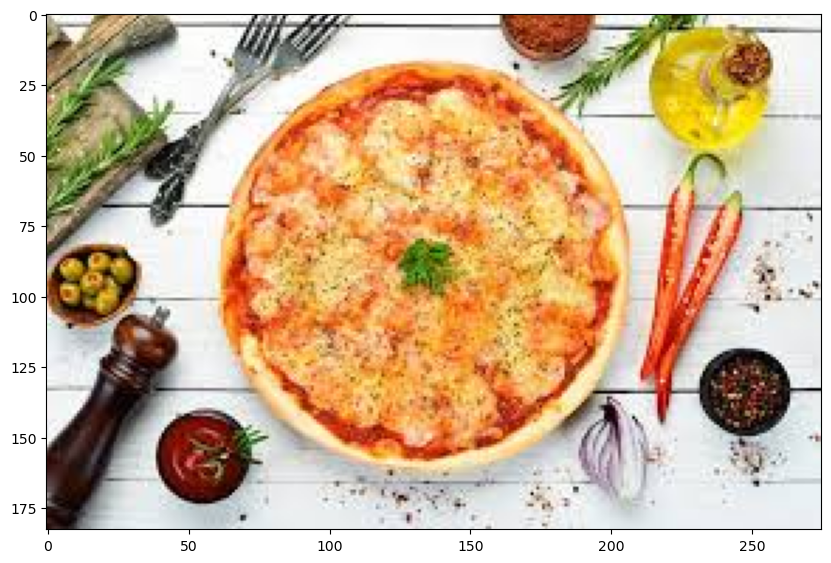

In [42]:
img = cv2.imread("pizza3.jpeg")   #image path
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.axis('on')
plt.show()

In [43]:

predictor.set_image(img)


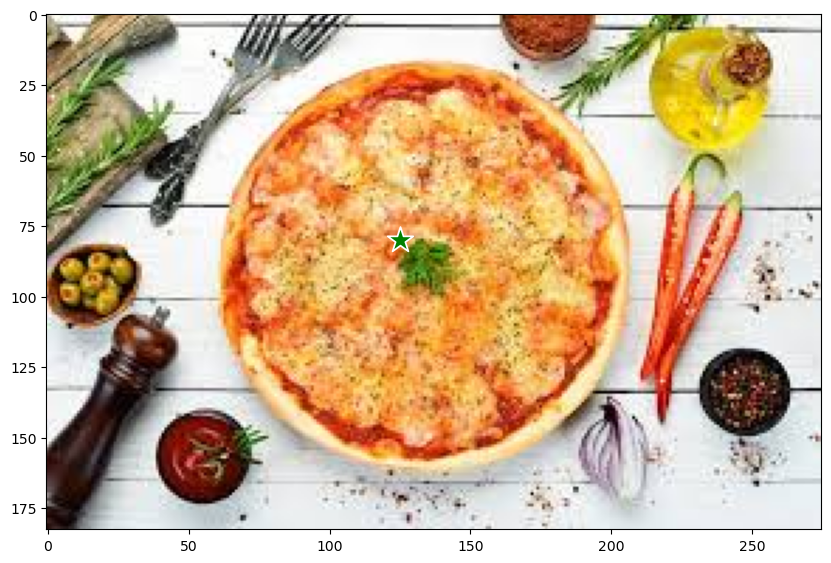

In [45]:
input_point = np.array([[125,80]])
input_label = np.array([1])
plt.figure(figsize=(10,10))
plt.imshow(img)
show_points(input_point, input_label, plt.gca())
plt.axis('on')
plt.show()  

(183, 275, 3)
(3, 183, 275)


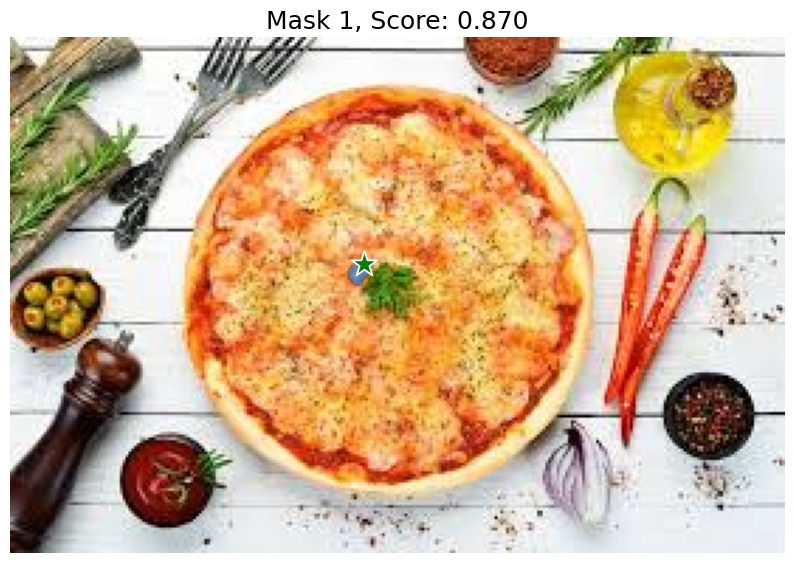

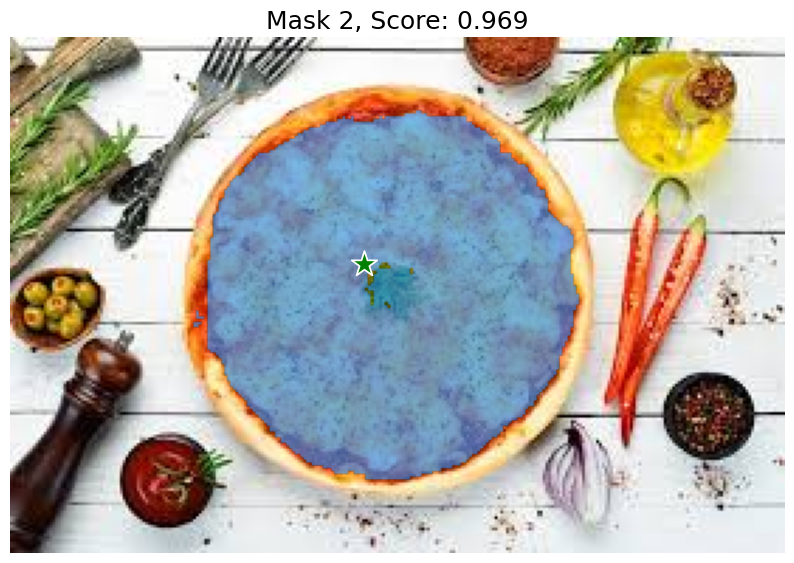

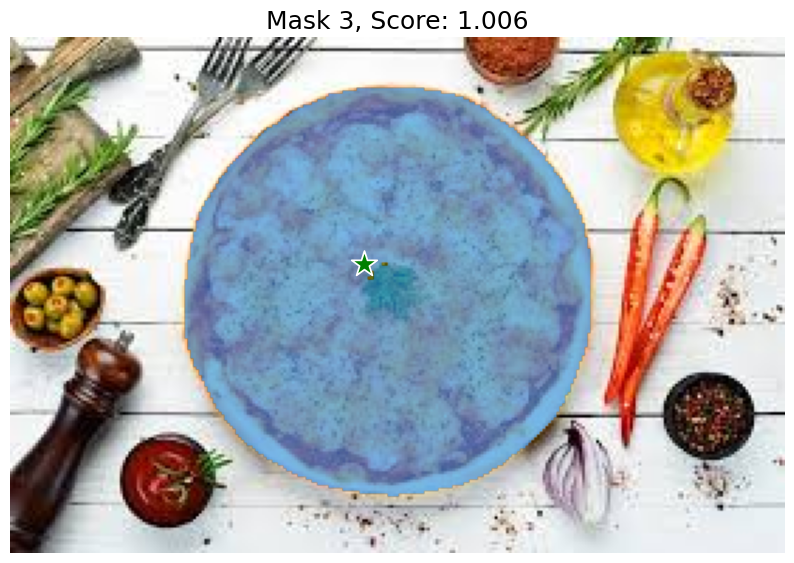

In [46]:
masks, scores, logits = predictor.predict(
    point_coords=input_point,
    point_labels=input_label,
    multimask_output=True,
)
print(img.shape)
print(masks.shape)
for i, (mask, score) in enumerate(zip(masks, scores)):
    plt.figure(figsize=(10,10))
    plt.imshow(img)
    show_mask(mask, plt.gca())
    show_points(input_point, input_label, plt.gca())
    plt.title(f"Mask {i+1}, Score: {score:.3f}", fontsize=18)
    plt.axis('off')
    plt.show()  

In [47]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

def apply_mask_on_image(img, mask):
    # Ensure the mask is a boolean array
    mask = mask.astype(bool)

    # Create a white image with the same shape as the input image
    white_bg = np.full(img.shape, 255, dtype=np.uint8)

    # Apply the mask to the input image by combining the masked area with the white background
    masked_img = np.where(mask[..., np.newaxis], img, white_bg)

    return masked_img
def resize_image_aspect_ratio(img_np, max_size=(224, 224)):
    img = Image.fromarray(img_np)
    img.thumbnail(max_size)
    img = img.resize(max_size)
    return np.array(img)
def resize_image(img_np, new_size=(224, 224)):
    img = Image.fromarray(img_np)
    img_resized = img.resize(new_size)
    return np.array(img_resized)

(224, 224, 3)


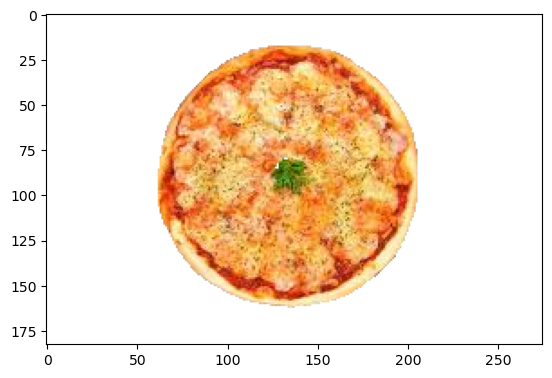

In [48]:
mask = masks[2]
score = scores[2]
masked_img = apply_mask_on_image(img, mask)
resized_masked_img = resize_image_aspect_ratio(masked_img, max_size=(224, 224))
print(resized_masked_img.shape)
plt.imshow(masked_img)
plt.show()

In [50]:
plt.imsave(f"train/pizza/pizza_003.png", resized_masked_img)